## 1. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 800)

import seaborn as sns
import matplotlib.pyplot as plt

# libraries needed for machine learning

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import random

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Load the data

In [4]:
df = pd.read_csv('1_Data_Project_LifeExpectancy_LinearRegression.csv')

## 3. Understanding the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
# to get to know about extra spaces in column names, it will help

num_col = df.select_dtypes(include = np.number).columns
print('Numerical columsna are : ', num_col)

cat_col = df.select_dtypes(exclude = np.number).columns
print('Categorical_cols are : ', cat_col)

Numerical columsna are :  Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical_cols are :  Index(['Country', 'Status'], dtype='object')


## 4. Data Pre-processing

In [9]:
# remove the extra spaces from column names

df = df.rename(columns = lambda x : x.strip())

In [10]:
# import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Status'] = label_encoder.fit_transform(df['Status'])

# developing = 1 and developed = 0
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# treating the missing values : We can drop the missing values or we can treat them

print(df.shape)
df.isnull().sum()

(2938, 22)


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
# replacing missing values with mean

for i in df.columns.drop('Country'):
    df[i].fillna(df[i].mean(), inplace = True)

## 5. Exploratory Data Analysis

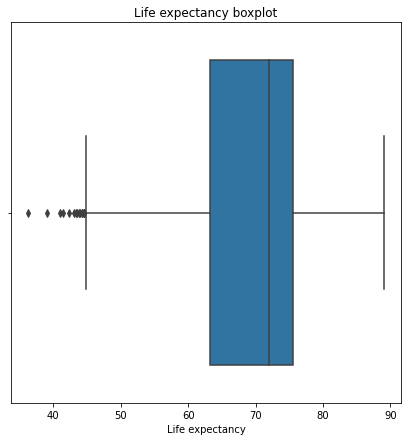

In [13]:
# We will first check distribution of y-variable

plt.figure(figsize = (7,7))
sns.boxplot(df['Life expectancy'])
plt.title('Life expectancy boxplot')
plt.show()

Text(0.5, 1.0, 'Life expectancy boxplot')

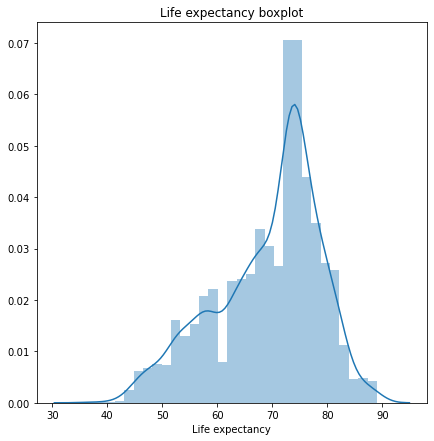

In [14]:
plt.figure(figsize = (7,7))
sns.distplot(df['Life expectancy'])
plt.title('Life expectancy boxplot')

By observing above distribution, we can say that, y-variable is almost linearly distributed and have very few outliers.
So, we can apply Linear Regression algorithm

In [15]:
num_col = df.select_dtypes(include = np.number).columns



<AxesSubplot:>

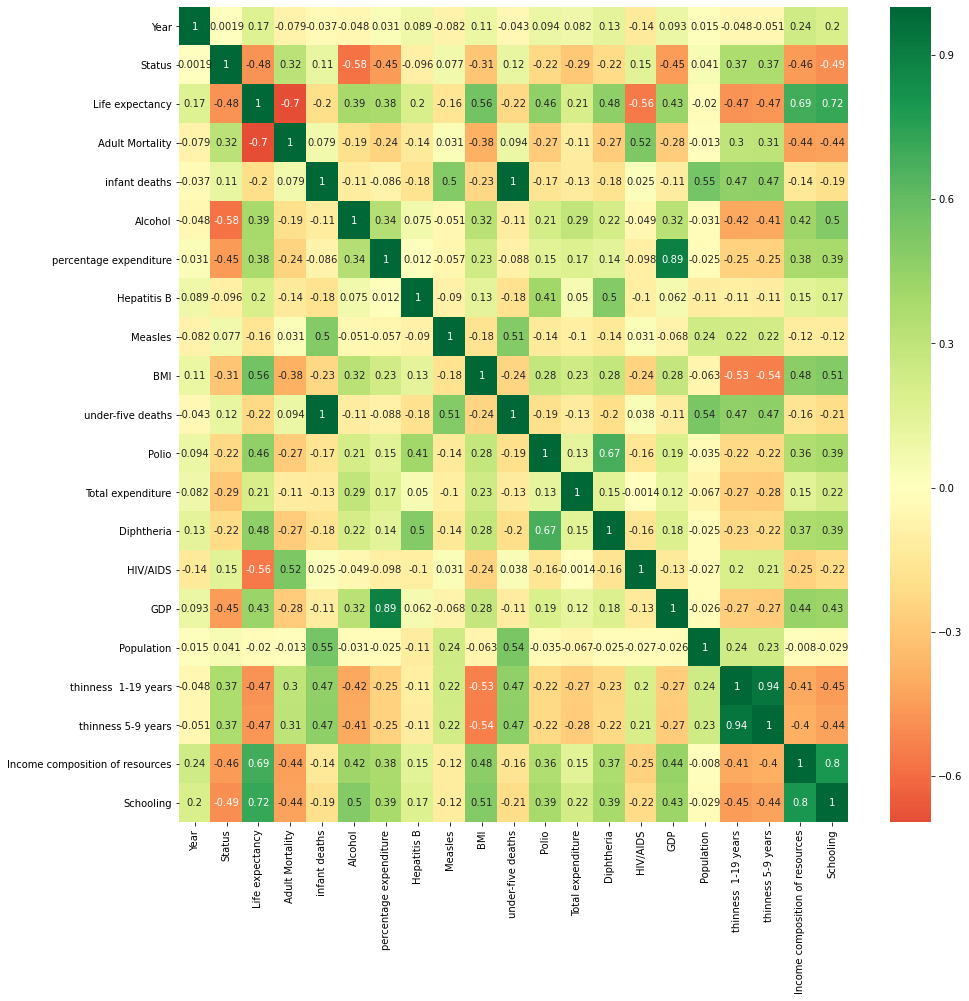

In [16]:
# Now, we will check the co-relation of one feature with another

plt.figure(figsize =(15,15))
sns.heatmap(df[num_col].corr(), annot = True, cmap= 'RdYlGn', center = 0)

### Analysis of heatmap
1. Life expectancy is positively co-related with Income composition and Schooling. It is negatively co-related with Adult Mortality Rate.

2. ' thinness  1-19 years' and' thinness 5-9 years' are co-related with each other. So, we will use only one of them for model building, beacause as per assumption of Linear Regression, there should not be multi-colinearity among features 

We can get to know, what is dependency of life expectancy on other features from pair-plot.
1. We can see that income composition is almost linearly correlated with life expectancy. This can be the starting point of our model building

## 6. Building Model

Here, we will use OLS (Ordinary Least Square) method for estimating the unknown parameters in a linear regression model

In [17]:
# Train-test split

x = df.drop(columns = ['Life expectancy','Country'])
y = df[['Life expectancy']]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 1234)
x_test['const'] = 1.0

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Approach 1 (Adding one variable after another)

### Building model with 1 variable

In [18]:
# Use of Ordinary Least Square for Linear Regression Model
x_train1 = x_train[['Income composition of resources']]
# Add a constant
x_train1 = sm.add_constant(x_train1)

# create ols model
model_1 = sm.OLS(y_train, x_train1).fit()

In [19]:
# check parameters
model_1.params

const                              48.440947
Income composition of resources    33.059741
dtype: float64

In [20]:
# sumary of the model

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     1974.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):          1.09e-302
Time:                        12:30:21   Log-Likelihood:                -6894.3
No. Observations:                2056   AIC:                         1.379e+04
Df Residuals:                    2054   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

From above summary, we can observe:
1. R-square is around 50%, which means variation in y is 50% defined by x-variable. So, we have to add more variables to model
2. p-value is less than 0.05, which means we can accept the model
3. Equation of fitted line,
                life expectancy = 48.44 + 33.05(Income composition of resources)
                

Now, we will add more variables to model

### Building model with 2 variables

In [21]:
x_train2 = x_train[['Schooling','Income composition of resources']]

In [22]:
# Add constant
x_train2 = sm.add_constant(x_train2)

# Build 2nd model
model_2 = sm.OLS(y_train, x_train2).fit()

In [23]:
model_2.params

const                              43.145928
Schooling                           1.320315
Income composition of resources    16.273079
dtype: float64

In [24]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     1316.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:30:21   Log-Likelihood:                -6738.3
No. Observations:                2056   AIC:                         1.348e+04
Df Residuals:                    2053   BIC:                         1.350e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We can see that, R-squared value has been increased. 

So, now we will add one more feature to the model, which is having strong correlation with y-variable

### Building model with 3 variables

In [25]:
x_train3 = x_train[['Schooling','Income composition of resources', 'Adult Mortality']]

#Add constant
x_train3 = sm.add_constant(x_train3)

# Build 3rd model

model_3 = sm.OLS(y_train,x_train3).fit()

In [26]:
model_3.params

const                              56.227689
Schooling                           1.003654
Income composition of resources    10.637516
Adult Mortality                    -0.034790
dtype: float64

In [27]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1765.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:30:22   Log-Likelihood:                -6275.3
No. Observations:                2056   AIC:                         1.256e+04
Df Residuals:                    2052   BIC:                         1.258e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We can interpret the model as:
1. All the variables are having significant p-value. Hence Linear regression exists
2. Adjusted r-squared value has gone up, means adding 3rd variable s useful

Equation of fitted line :
                        L.E. = 56.2277 + 1(scooling) + 10.63(Income composition of resources) - 0.03(Adult Mortality

### Approach 2 - Stepwise Regression

 Whatever steps we did manually to add the features, now we will do it using a function which will automate the process of selection of features according to p-values threshold provided by us.
 
This function will suggest us, which features to add to model, to make the model robust

In [28]:
# Stepwise Regression

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        
        
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            goose = new_pval.index[best_feature]
            
            included.append(goose)
            
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(goose, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(x_train, y_train)

print('resulting features:')
print(result)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Schooling                      with p-value 0.0


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Adult Mortality                with p-value 2.94814e-217


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  HIV/AIDS                       with p-value 8.85176e-80


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Diphtheria                     with p-value 6.63636e-50


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  BMI                            with p-value 6.41342e-29


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Income composition of resources with p-value 6.43838e-22


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Status                         with p-value 1.13954e-15


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  percentage expenditure         with p-value 9.00493e-08


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Polio                          with p-value 5.68587e-07


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Measles                        with p-value 8.01425e-06


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  Hepatitis B                    with p-value 9.17377e-06


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  under-five deaths              with p-value 0.00233237


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  infant deaths                  with p-value 5.69409e-21


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


Add  thinness  1-19 years           with p-value 0.00227501


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


resulting features:
['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']


In [29]:
# We will use above features for model building
x_train_stepwise = x_train[['Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]

# Adding constant
x_train_stepwise = sm.add_constant(x_train_stepwise)
model_stepwise = sm.OLS(y_train, x_train_stepwise).fit()

print(model_stepwise.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     677.3
Date:                Fri, 25 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:31:06   Log-Likelihood:                -5807.2
No. Observations:                2056   AIC:                         1.164e+04
Df Residuals:                    2041   BIC:                         1.173e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

We can interpret summary of the model as follows:
1. Adjusted R-squared value is 0.822, which is quite good
2. All the features are having significant p-values less than 0.05

When we were building model manuallly, maximum R-squared value reached was 0.72 , but Stepwise Regression gave us 0.822 and that is the beauty of Stepwise Regression

## 7. Model Prediction and Evaluation

In [30]:
# Predicting on Test dataset
x_test_stepwise = x_test[['const','Schooling', 'Adult Mortality', 'HIV/AIDS', 'Diphtheria', 'BMI', 'Income composition of resources', 'Status', 'percentage expenditure', 'Polio', 'Measles', 'Hepatitis B', 'under-five deaths', 'infant deaths', 'thinness  1-19 years']]
actual = y_test['Life expectancy']
prediction = model_stepwise.predict(x_test_stepwise)


In [31]:
# Evaluation MSE
model_mse = mean_squared_error(prediction, actual)
print(model_mse)

15.972714682411747


In [32]:

def mse_percentage(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true))*100

In [33]:
mse_percentage(actual, prediction)

4.5582486662075

Mean absolute percentage error of the model is only 4.55%, which means our model is performing well on unknown data

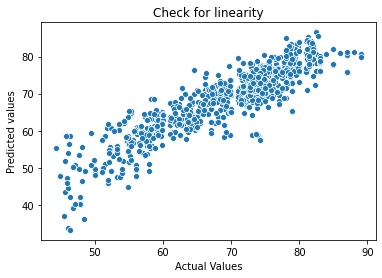

In [34]:
# Check for linearity
sns.scatterplot(y_test['Life expectancy'], prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Check for linearity')
plt.show()

We can observe that, actual values and predicted values are linearly dependent

Hence, model passes test for the linearity

Text(0.5, 0, 'Errors')

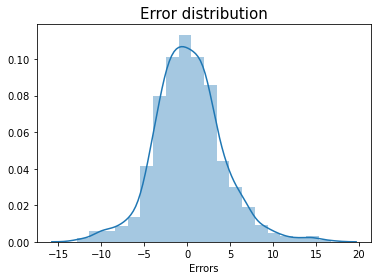

In [35]:
# Error check
# Plot the histogram for error terms
fig = plt.figure()
sns.distplot((y_test['Life expectancy']- prediction), bins = 20)
plt.title('Error distribution', fontsize = 15)
plt.xlabel('Errors')

Mean of the errors is almost zero and errors are normally distributed 

So, model also passes this check

Now, our model is ready to predict life expectancy.

We can handover it to WHO and WHO can recommend any countries about which features to focus upon.
Ex. - WHO can suggest a country that, if you increase your funding for schooling, Life expectancy will incraese.

## Thank You .....!